<a href="https://colab.research.google.com/github/AkashBabu1712/Machine-Learning-/blob/main/Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Linear Regression Algorithm

### What is Linear Regression in Machine Learning?

1. Regression quantifies how the dependent variable changes as the independent variable itself take different values.

1. Linear Regression is an algorithm that belongs to supervised Machine Learning.

1. It tries to apply relations that will predict the outcome of an event based on the independent variable data points.

1. The relation is usually a straight line that best fits the different data points as close as possible. The output is of a continuous form, i.e., numerical value, the number of products sold etc.

![explanation](https://miro.medium.com/v2/resize:fit:1200/1*N1-K-A43_98pYZ27fnupDA.jpeg)


Linear regression can be expressed mathematically as:

**y= β0+ β 1x+ ε**

Here,

Y= Dependent Variable  
X= Independent Variable  
β 0= intercept of the line  
β1 = Linear regression coefficient (slope of the line)
ε = random error

The last parameter, random error ε, is required as the best fit line also doesn't include the data points perfectly.

### Types of Linear Regression

Linear Regression can be broadly classified into two types of algorithms:

1. **Simple Linear Regression:**
A simple straight-line equation involving slope (dy/dx) and intercept (an integer/continuous value) is utilized in simple Linear Regression. Here a simple form is:

<i>

> y=mx+c where y denotes the output


> x is the independent variable

> c is the intercept when x=0.

With this equation, the algorithm trains the model of machine learning and gives the most accurate output</i>





2. **Multiple Linear Regression:**
When a number of independent variables more than one, the governing linear equation applicable to regression takes a different form like:

<i>

> y= c+m1x1+m2x2… mnxn where represents the coefficient responsible for impact of different independent variables x1, x2 etc.

</i>

This machine learning algorithm, when applied, finds the values of coefficients m1, m2, etc., and gives the best fitting line.


3. **Non-Linear Regression:**
When the best fitting line is not a straight line but a curve, it is referred to as Non-Linear Regression.

### Linear Regression Terminologies

#### 1. Cost Function:referred to as Mean Square Error (MSE)

The output which is obtained or predicted by an algorithm is referred to as yˆ (pronounced as yhat).

The difference between the actual and predicted values is the error, i.e., y -  yˆy^. *Different values of y- yˆy^ (loss function) are obtained when the model repeatedly tries to find the best relation.*

**The average summation of all loss function values is called the cost function**

where J = cost function

n= number of observations (i = 1 to n)

∑ = summation

predi = predicted output

yi = actual value.  

![](https://www.knowledgehut.com/_next/image?url=https%3A%2F%2Fd2o2utebsixu4k.cloudfront.net%2Fmedia%2Fimages%2F1667577517527-linear%20regression%20for%20machine%20learning-2.png&w=640&q=75)

#### 2. Gradient Descent:

* It is a popular optimization approach employed in training machine learning
models by reducing errors between actual and predicted outcomes.

* Optimization in machine learning is the task of minimizing the cost function parameterized by the model's parameters.

* The primary goal of gradient descent is to minimize the convex function by parameter iteration.

![Gradient Decent](https://d2o2utebsixu4k.cloudfront.net/media/images/1667577540722-linear%20regression%20for%20machine%20learning-3.png)

* A slower learning rate helps to reach the global minimum but takes an unusually long time and computationally proves expensive.

* The faster learning rate may make the model wander and lead to an undesired position, making it difficult to come back on the correct track to reach the global minimum. Hence *the learning rate should be neither too slow nor too fast if the global minimum is to be reached efficiently*.

# Practical expalantion with code example

In [1]:
#import the necessary libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [2]:
# Loading the data
car_data = pd.read_csv('/content/drive/MyDrive/Datasets/car data.csv')

In [3]:
#checking for few data
car_data.head() #head() -> shows only first 5 rows by default

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [4]:
# Getting some information about the dataset
car_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


It is 301 rows and 9 columns dataset, and there are no null values in it. The output ‘Selling_Price’ is the target, and there are multiple independent variables that affect this value.

In [5]:
# convert categorical variables i.e., "Fuel_Type", "Seller_Type" and "Transmission" (dtype=object),
#into numerical variables before applying a regression algorithm

car_data.replace({'Fuel_Type':{'Petrol':0,'Diesel':1,'CNG':2}},inplace=True)
car_data.replace({'Seller_Type':{'Dealer':0,'Individual':1}},inplace=True)
car_data.replace({'Transmission':{'Manual':0,'Automatic':1}},inplace=True)

<ipython-input-6-7de95dbbb814>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corrMatrix = car_data.corr()


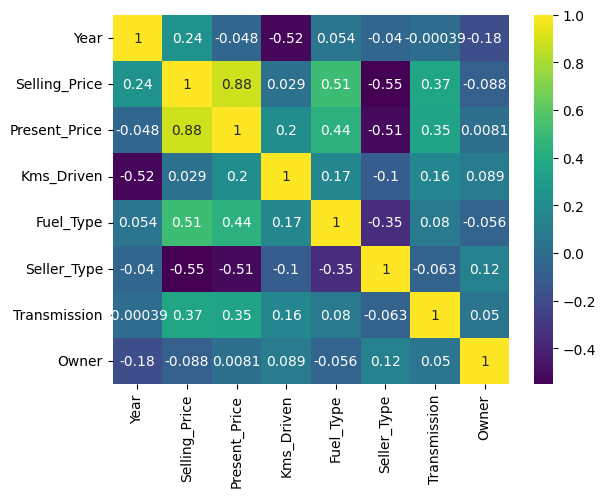

In [6]:
#To understand the relationship between different attributes in the dataset,
#we will plot a correlation matrix using the following code:

corrMatrix = car_data.corr()
sns.heatmap(corrMatrix, annot=True, cmap="viridis")
plt.show()

*higher negative value or positive values indicate a strong correlation*

In [7]:
#Splitting the Dataset
#use an 80:20 split for training and testing the model

X = car_data.drop(['Car_Name','Selling_Price'],axis=1)
Y = car_data['Selling_Price']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=42)

In [8]:
# loading the linear regression model

lin_reg_model = LinearRegression()

#Now we can fit the model to our dataset
lin_reg_model.fit(X_train,Y_train)

LinearRegression()

In [9]:
# prediction on Training data
training_data_prediction = lin_reg_model.predict(X_train)

In [10]:
# R squared Error
train_error_score = metrics.r2_score(Y_train, training_data_prediction)
print("R squared Error - Training : ", train_error_score)

R squared Error - Training :  0.883979349675079


In [11]:
# prediction on Training data
Y_pred = lin_reg_model.predict(X_test)

In [12]:
# R squared Error
test_error_score = metrics.r2_score(Y_test, Y_pred)
print("R squared Error - Test: ", test_error_score)

R squared Error - Test:  0.8468053957655798


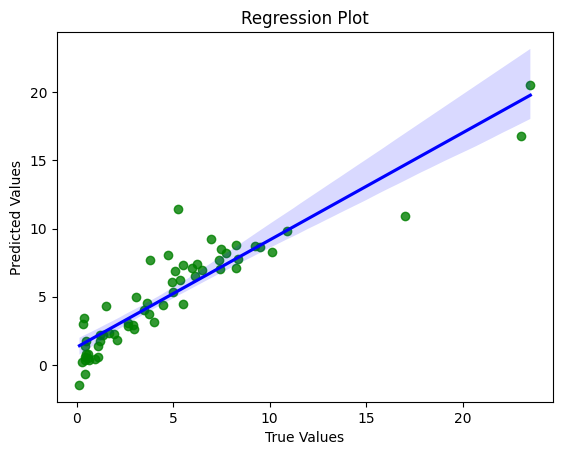

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt  # Import matplotlib for plotting

# create scatterplot with regression line

# Create a regression plot
sns.regplot(
    x=Y_test,        # Independent variable (X-axis)
    y=Y_pred,        # Dependent variable (Y-axis)
    scatter_kws={"color": "green"},  # Scatter plot customization
    line_kws={"color": "blue"}       # Regression line customization
)

# Optionally, add labels and a title
plt.xlabel("True Values")
plt.ylabel("Predicted Values")
plt.title("Regression Plot")

# Show the plot
plt.show()


## Assumptions of Linear Regression



1. Linearity
2. Homoscedasticity
3. Non-multicollinearity
4. No Autocorrelation
5. Not applicable to Outliers



## Advantages:

1. For linear datasets, Linear Regression performs well to find the nature of the relationship among different variables.

1. Linear Regression algorithms are easy to train and the Linear Regression models are easy to implement.

1. The Linear Regression models are likely to over-fit, but can be avoided using dimensionality reduction techniques such as regularization (L1 and L2) and cross-validation.


## Disadvantages of Linear Regression

1. It is prone to noise and overfitting. In datasets where the number of observations is lesser than the attributes, Linear Regression might not be a good choice as it can lead to overfitting. This is because the algorithm can start considering the noise while building the model.

1.  
Sensitive to outliers, it is essential to pre-process the dataset and remove the outliers before applying Linear Regression to the data.
1.
It does not assume multicollinearity. If there is any relationship between the independent variables, i.e., multicollinearity, then it needs to be removed using dimensionality reduction techniques before applying Linear Regression as the algorithm assumes that there is no relationship among independent variables.



>                                                     Continue Learning.....



---

